# Contents

* [Integration](#Integration)
    * [General integration](#General-integration)
    * [General multiple integration (dblquad, tplquad, nquad)](#General-multiple-integration-(dblquad,-tplquad,-nquad))
    * [Integrating using Samples](#Integrating-using-Samples)
* [Fast Fourier Transform](#Fast-Fourier-Transform)
* [Discrete Cosine Transform](#Discrete-Cosine-Transform)
* [Interpolation](#Interpolation)
* [Splines](#Splines)
* [Linalg](#Linalg)
    * [Linear Equations](#Linear-Equations)
    * [Finding a Determinant](#Finding-a-Determinant)
    * [Eigenvalues and Eigenvectors](#Eigenvalues-and-Eigenvectors)
    * [Singular Value Decomposition](#Singular-Value-Decomposition)
* [K-Means](#K-Means)
* [Referans Link](#Referans-Link)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Integration

### General integration

In [2]:
from scipy.integrate import quad
import scipy.special as special

<img src="images/Jx.png" align="Left"/>

In [3]:
result = quad(lambda x: special.jv(2.5,x), 0, 4.5)
result

(1.1178179380783253, 7.866317182537226e-09)

<img src="images/X.png" align="Left"/>

In [4]:
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

<img src="images/Ex.png" align="Left"/>

In [5]:
#special.expn(n,x)
special.expn(3, np.arange(1.0,4.0,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

<img src="images/In.png" align="Left"/>

In [6]:
result = quad(lambda x: special.expn(3, x), 0, np.inf)
result

(0.3333333333332145, 1.8562421924195064e-09)

### General multiple integration (dblquad, tplquad, nquad)

In [7]:
from scipy.integrate import dblquad, nquad

<img src="images/I1.png" align="Left"/>

In [8]:
area = dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)
area

(0.010416666666666668, 4.101620128472366e-16)

<img src="images/I2.png" align="Left"/>

In [9]:
N = 5
def f(t, x):
    return np.exp(-x*t) / t**N

In [10]:
nquad(f, [[1, np.inf],[0, np.inf]])

(0.2000000000189363, 1.3682975855986131e-08)

### Integrating using Samples

In [11]:
def f1(x):
    return x**2

def f2(x):
    return x**3

x = np.array([1,3,4])
y1 = f1(x)

<img src="images/I3.png" align="Left"/>

In [12]:
from scipy.integrate import simps
I1 = simps(y1, x)
print(I1)

21.0


<img src="images/I4.png" align="Left"/>

In [13]:
y2 = f2(x)
I2 = simps(y2, x)
print(I2)

61.5


## Fast Fourier Transform

In [14]:
from scipy.fftpack import fft, ifft, fftfreq

In [15]:
#create an array with random n numbers
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])

#Applying the fft function
y = fft(x)
print y

[ 4.5       +0.        j  2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]


In [16]:
yinv = ifft(y)
print yinv

[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


In [17]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 *np.random.randn(time_vec.size)
print sig.size

1000


In [18]:
sample_freq = fftfreq(sig.size, d = time_step)
sig_fft = fft(sig)
print sig_fft[:10]

[  9.78072922+0.00000000e+00j   8.78691475-2.11388613e+01j
   8.37098901-9.92079325e+00j  -8.48737494+1.11753818e-01j
  -6.34174316-5.18655931e+02j  15.24811502-2.51972586e+01j
 -20.55779781+2.03185896e+00j   5.49871978+9.55919883e+00j
   6.06106004-1.77972850e+01j   8.31349707-4.91139374e+00j]


## Discrete Cosine Transform

In [19]:
from scipy.fftpack import dct, idct

In [20]:
#create an array with random n numbers
x = np.array([4., 3., 5., 10., 5., 3.])

#Applying the dct function
dct(x)

array([ 60.        ,  -3.48476592, -13.85640646,  11.3137085 ,
         6.        ,  -6.31319305])

In [21]:
idct(x)

array([ 39.15085889, -20.14213562,  -6.45392043,   7.13341236,
         8.14213562,  -3.83035081])

## Interpolation

In [22]:
from scipy.interpolate import interp1d

In [23]:
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
print x,y

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


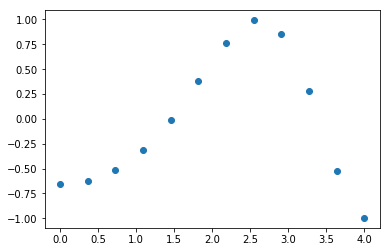

In [24]:
plt.plot(x, y,'o')
plt.show()

In [25]:
f1 = interp1d(x, y,kind = 'linear')
f2 = interp1d(x, y, kind = 'cubic')

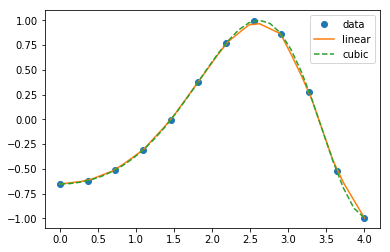

In [26]:
xnew = np.linspace(0, 4,30)

plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc = 'best')
plt.show()

## Splines

In [27]:
from scipy.interpolate import UnivariateSpline

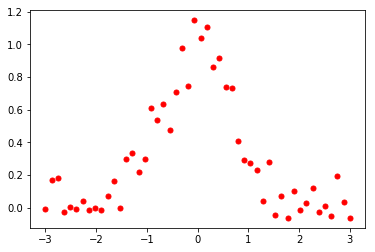

In [28]:
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms = 5)
plt.show()

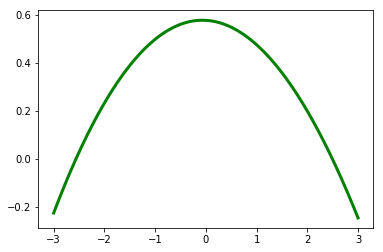

In [29]:
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw = 3)
plt.show()

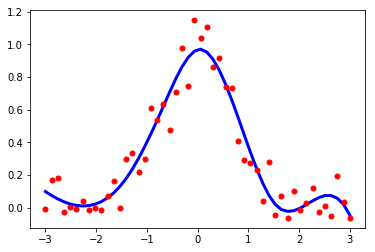

In [30]:
spl.set_smoothing_factor(0.5)
plt.plot(x, spl(x), 'b', lw = 3)
plt.plot(x, y, 'ro', ms = 5)
plt.show()

## Linalg

In [31]:
from scipy import linalg

### Linear Equations

<img src="images/equations.png" align="Left"/>

In [32]:
#Declaring the numpy arrays
a = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
b = np.array([10, 8, 3])

print "a : ", a, "\n"
print "b : ", b, "\n"

#Passing the values to the solve function
x = linalg.solve(a, b)

#printing the result array
print "x : ",x


a :  [[1 3 5]
 [2 5 1]
 [2 3 8]] 

b :  [10  8  3] 

x :  [-9.28  5.16  0.76]


### Finding a Determinant

In [33]:
#Declaring the numpy array
A = np.array([[1,2],[3,4]])
print "A : ", A, "\n"

#Passing the values to the det function
x = linalg.det(A)

#printing the result
print "determinant(A) : ", x

A :  [[1 2]
 [3 4]] 

determinant(A) :  -2.0


### Eigenvalues and Eigenvectors

<img src="images/vector.jpg" align="Left" width="600" height="600"/>
<img src="images/vector2.jpg" align="Left" width="600" height="600"/>

In [34]:
#Declaring the numpy array
A = np.array([[1,2],[3,4]])

#Passing the values to the eig function
l, v = linalg.eig(A)

#printing the result for eigen values
print "l : ", l, "\n"

#printing the result for eigen vectors
print "v : ", v

l :  [-0.37228132+0.j  5.37228132+0.j] 

v :  [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


### Singular Value Decomposition

<img src="images/svd.jpg" align="Left"/>

In [35]:
#Declaring the numpy array
a = np.random.randn(3, 2) + 1.j*np.random.randn(3, 2)

#Passing the values to the eig function
U, s, Vh = linalg.svd(a)

# printing the result
print "U : ", U, "\n" 
print "S : ", s, "\n"
print "Vh : ", Vh

U :  [[-0.10080153-0.05546589j -0.19732496-0.73017398j  0.5948808 +0.24655273j]
 [-0.48029387-0.75397513j -0.23399868+0.25952646j -0.02652407+0.27933209j]
 [ 0.36341263-0.23565473j  0.34384663+0.43309232j  0.70937408-0.05819853j]] 

S :  [3.75311733 2.8513085 ] 

Vh :  [[-0.69869371+0.        j  0.54125466-0.46783597j]
 [-0.71542093+0.        j -0.52859961+0.45689752j]]


## K-Means

In [36]:
from scipy.cluster.vq import kmeans,vq,whiten

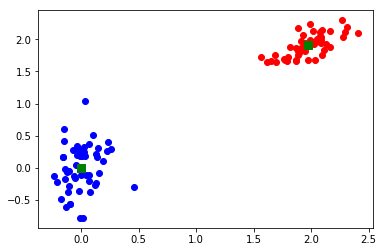

In [37]:
# Create 50 datapoints in two clusters a and b
pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],
                                  [[10, 2], [2, 1]],
                                  size=pts)
features = np.concatenate((a, b))


# Whiten data
whitened = whiten(features)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)

# assign each sample to a cluster
idx,_ = vq(whitened,codebook)


plt.plot(whitened[idx==0,0], whitened[idx==0,1],'ob',
         whitened[idx==1,0], whitened[idx==1,1],'or')

plt.plot(codebook[:,0],codebook[:,1],'sg',markersize=8)
plt.show()

## Referans Link

### https://www.tutorialspoint.com/scipy/index.htm